In [44]:
# Question 1
import numpy as np
from numpy import genfromtxt
from sklearn import preprocessing

# Load stock csv's and assign to y and x
stock_price = genfromtxt('stock_price.csv', delimiter=',')  # Predicted 
y = np.reshape(stock_price, (len(stock_price),1))

stock_prediction = genfromtxt('stock_prediction_data.csv', delimiter=',')
X = stock_prediction

# Preprocessing
X = preprocessing.scale(X)

In [29]:
# Sklearn linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

pred_y = reg.predict(X)

sklearn_mse = sum((pred_y[i]-y[i])**2 for i in range(len(y)))/len(y)
print(f'MSE of sklearn solution {sklearn_mse}')

MSE of sklearn solution [0.04357044]


In [30]:
# Closed form solution
def MSE(phi, w, y):
    return sum((phi.dot(w)[i]-y[i])**2 for i in range(len(y)))/len(y)

phi = np.hstack((X, np.ones((len(X), 1))))  # Create phi matrix

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)

closed_form_error = MSE(phi, w, y)
print(f'MSE of closed form solution: {closed_form_error}')

MSE of closed form solution: [0.04357044]


In [31]:
# Gradient Descent

phi = np.hstack((X, np.ones((len(X), 1)))) # Create phi matrix 
n = len(y)

def f(w, phi, n):
    return 1/n * sum((w.T.dot(phi[i, :])-y[i])**2 for i in range(n))

def f_prime(w, phi, n):
    sigma = sum((w.T.dot(phi[i, :])-y[i]) * phi[i, :] for i in range(n))
    return (2/n) * sigma


w = np.random.randn(phi.shape[1])
eta = 0.002
for i in range(1000):
    w = w - eta * f_prime(w, phi, n)
   
print(f'MSE using gradient descent: {f(w, phi, n)}')

MSE using gradient descent: [0.07203101]


In [33]:
# Question 2
# Sklearn polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
newX = poly.fit_transform(X)

reg = LinearRegression().fit(newX, y)

pred_y = reg.predict(newX)

sklearn_mse_poly = sum((pred_y[i]-y[i])**2 for i in range(len(y)))/len(y)
print(f'MSE of sklearn polynomial solution {sklearn_mse_poly}')

MSE of sklearn polynomial solution [0.03550108]


In [34]:
# closed form polynomial
def MSE(phi, w, y):
    return sum((phi.dot(w)[i]-y[i])**2 for i in range(len(y)))/len(y)

poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)

closed_form_error = MSE(phi, w, y)
print(f'MSE of closed form solution: {closed_form_error}')

MSE of closed form solution: [0.03550108]


In [35]:
# Gradient Descent Polynomial
n = len(y)

poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)

def f(w, phi, n):
    return 1/n * sum((w.T.dot(phi[i, :])-y[i])**2 for i in range(n))

def f_prime(w, phi, n):
    sigma = sum((w.T.dot(phi[i, :])-y[i]) * phi[i, :] for i in range(n))
    return (2/n) * sigma


w = np.random.randn(phi.shape[1])
eta = 0.002
for i in range(1000):
    w = w - eta * f_prime(w, phi, n)
   
print(f'MSE using gradient descent: {f(w, phi, n)}')

MSE using gradient descent: [0.65196338]


In [42]:
# Question 3
x = np.array([[0], [1], [2], [3]])
y = np.array([[1], [0], [2], [-2]])

phi = np.hstack((x, np.ones((len(x), 1))))

w = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y)
print(f'The best a: {w[0]}')
print(f'The best b: {w[1]}')

The best a: [-0.7]
The best b: [1.3]


In [48]:
# Question 6
from numpy import genfromtxt
import matplotlib.pyplot as plt

lunch_wait_time = genfromtxt('lunch_wait_time.csv', delimiter=',')

sat = genfromtxt('SAT.csv', delimiter=',')

student_age = genfromtxt('student_age.csv', delimiter=',')

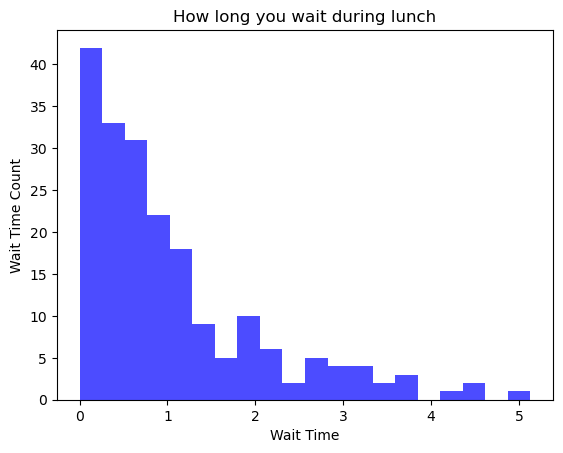

Average wait time: 1.0405


In [49]:
# Average lunch time
n, bins, patches = plt.hist(lunch_wait_time, 20, facecolor='blue', alpha=0.7)

plt.title('How long you wait during lunch')
plt.xlabel('Wait Time')
plt.ylabel('Wait Time Count')

plt.show()
print(f'Average wait time: {np.average(lunch_wait_time)}')

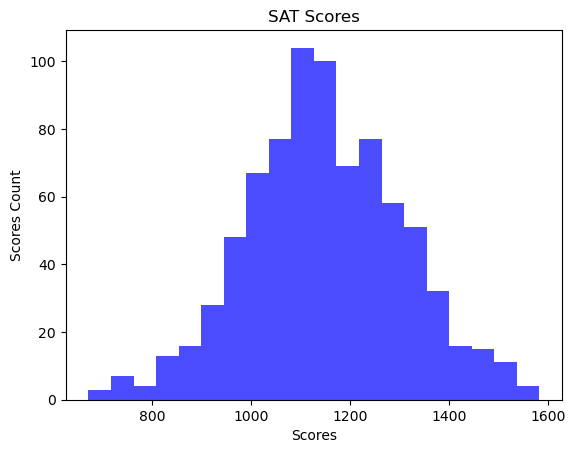

Average SAT Score: 1147.82875


In [56]:
# SAT
sat_n, sat_bins, patches = plt.hist(sat, 20, facecolor='blue', alpha=0.7)

plt.title('SAT Scores')
plt.xlabel('Scores')
plt.ylabel('Scores Count')

plt.show()
print(f'Average SAT Score: {np.average(sat)}')

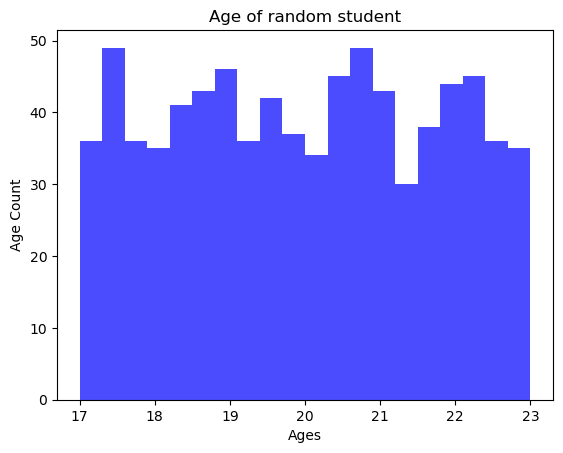

Average age of student: 19.931625


In [51]:
# Ages of students
n, bins, patches = plt.hist(student_age, 20, facecolor='blue', alpha=0.7)

plt.title('Age of random student')
plt.xlabel('Ages')
plt.ylabel('Age Count')

plt.show()

print(f'Average age of student: {np.average(student_age)}')

In [65]:
# Probabilities 
print(f'Probability that someone got more than a 1200 on sat: {len(sat[sat>1200])/len(sat)}')
print(f'Probability that someone got more than a 1200 on sat: {len(lunch_wait_time[lunch_wait_time>5])/len(lunch_wait_time)}')
print(f'Probability that someone got more than a 1200 on sat: {len(student_age[student_age<19])/len(student_age)}')

Probability that someone got more than a 1200 on sat: 0.3575
Probability that someone got more than a 1200 on sat: 0.005
Probability that someone got more than a 1200 on sat: 0.34125


In [75]:
# Question 7
def solved_integral(x):
    (1/3)*x**3 - (1/2)*x**2 + x

roots = np.roots([1/3, -1/2, 1, -1])
print(f'Roots: {roots}')
print(f'b = {roots[-1]}')  # Other roots are complex, 1.5365 is only real number

Roots: [0.17317357+1.60326122j 0.17317357-1.60326122j 1.15365286+0.j        ]
b = (1.1536528590388515+0j)
